# SPAM MESSAGES – MACHINE LEARNING

## Imports

In [35]:
# Imports 

# Packages Required for Visualization & Feature Engineering
import numpy as np 
import pandas as pd
import seaborn as sns
import math
import copy
import sklearn
from collections import Counter

# Functions Required for Confusion Matrices
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Functions Required for Constructing Training and Testing Data Sets 
from sklearn.model_selection import train_test_split

# Functions Required for Different Methods of Machine Learning
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 

# Functions Required for Evaluating Results
from sklearn.metrics import accuracy_score
from sklearn import metrics 

# Removing Warnings
import warnings
warnings.filterwarnings('ignore')

## Section One: The Data Set
Section one deals with importing the data set and feature engineering it to include variables that will be used in the Logistic Regression, Multinomial Naive Bayes, and Bernoulli Naive Bayes. 
### The Original Data Set
#### Importing the Data and Describing the Data Set
The import data set is a csv file obtained from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset. The owner of the data set is UCI Machine Learning and the data set was last updated about seven years ago. The data set is named "SMS Spam Collection Data Set" and it contains 5 columns and 5572 observations. The first column is named v1 and contains string values `spam` and `ham`. The second column is named v2 and contains string values denoting the sms message sent. The third, fourth, and fifth columns contain primarily null (NaN) values for most observations. 13.4% of the data set is spam messages and 86.6% of the data set is ham messages. 

In [33]:
df = pd.read_csv("spam.csv", encoding='cp1252')
print("Number of Observations: ", len(df))
print("Number of Columns: ", len(df.columns))
print("Proportion of Spam Messages: ", len(df[df["v1"] == "spam"])/len(df))
print("Proportion of Ham Messages: ", len(df[df["v1"] == "ham"])/len(df))
df.head()

Number of Observations:  5572
Number of Columns:  5
Proportion of Spam Messages:  0.13406317300789664
Proportion of Ham Messages:  0.8659368269921034


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Variable Definitions

The table below displays the variables that appear in the original data set and their definitions. 

|Variables|Definitions| 
|--- |----------| 
| `v1` | Contains string values `spam` and `ham` denoting to whether the message is spam or ham |
| `v2` | Contains a string value showing the email message |  
| `Unnamed: 2` | Contains NaN values, except for a few observations | 
| `Unnamed: 3` | Contains NaN values, except for a few observations |
| `Unnamed: 4` | Contains NaN values, except for a few observations |  

### Cleaning the Data & Feature Engineering
#### Replacing Unused Variables & Feature Engineering 
The first data frame, `spam_df`, will be a feature engineered version of the original data frame `df`. The new `spam_df` data frame will replace the `v1` and `v2` columns with the column names `Spam?` and `Message` respectively, and the `Spam?` column will now include integer value 0 if the message is `ham` and integer value 1 if the message is `spam`. As well, this data frame will drop the unnamed columns (`Unnamed: 2`, `Unnamed: 3`, and `Unnamed: 4`). 

Using feature engineering, new columns are added to the data frame to increase the number of factors influencing the results of the logistic regression and multinomial naive bayes tests. These new columns include `num_phone_related`, `num_winner`, `greetings`, `num_of_website`, `num_rand_letters`, `num_money`, `length_of_mess`, `spam_word_count`, and `ham_word_count`, which are all defined in the data preceding the displayed data frame. 

The `spam_word_count` and `ham_word_count` columns feature integer values counting the number of appearances of a 'spam' words and 'ham' words in each message. 'Spam' words are defined as the top thirty words that appear in spam messages in the data set. 'Ham' words are defined as the top thirty words that appear in ham messages in the data set. These words are listed in a table below the variable definitions.

In [34]:
# Removing Excess Columns and Renaming
spam_df = df[["v1", "v2"]]
spam_df["Spam?"] = np.where(spam_df["v1"] == "spam", 1, 0)
spam_df = spam_df[["Spam?", "v2"]]
spam_df.rename(columns = {"v2": "Message"}, inplace=True)

# Feature Engineering New Variables
spam_df["num_phone_related"] = spam_df["Message"].str.lower().str.count("msg|sms|message|mobile|phone|call|txt|text|texting|send|reply") 
spam_df["num_winner"] = spam_df["Message"].str.lower().str.count("winner|congratulations|prize|jackpot|claim|vacation|cash|free|won|win|winning|iphone|money|ipad|cash") 
spam_df["greetings"] = spam_df["Message"].str.lower().str.count("hello|hi|what's up|whats up|sup|hey|heyy|heyyy|welcome|whatsup|hola|greetings|by|from")
spam_df["num_of_website"] = spam_df["Message"].str.lower().str.count("http|www|.com|.net|website|link|web|site|click|.gov") 
spam_df["num_rand_letters"] = spam_df["Message"].str.count("!|@|#|$|%|^|&|>|<|/+|=") - 2
spam_df["num_money"] = spam_df["Message"].str.lower().str.count("$|money|cash|card|free|credit|pay|venmo|cashapp|dollars|credits|dollar|cards") - 1
spam_df["length_of_mess"] = [len(mess) for mess in spam_df["Message"]]
spam_df["spam_word_count"] = spam_df["Message"].str.count("to|a|call|your|you|the|for|or|free|2|is|ur|on|txt|have|from|and|u|text|mobile|with|claim|reply|&|of|now|4|stop|our|this")
spam_df["ham_word_count"] = spam_df["Message"].str.count("i|you|to|the|a|u|and|in|my|is|me|of|for|that|it|have|your|but|are|so|not|on|at|i'm|can|if|do|will|be")
spam_df[:5]


,Spam?,Message,num_phone_related,num_winner,greetings,num_of_website,num_rand_letters,num_money,length_of_mess,spam_word_count,ham_word_count
0,0,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,111,17,20
1,0,Ok lar... Joking wif u oni...,0,0,0,0,0,0,29,3,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,2,0,1,1,1,155,19,16
3,0,U dun say so early hor... U c already then say...,0,0,0,0,0,0,49,8,8
4,0,"Nah I don't think he goes to usf, he lives aro...",0,0,1,0,0,0,61,7,9


#### Variable Definitions
The table below displays the variables that appear in the new data frame and their definitions. 

|Variables|Definitions| 
|--- |----------| 
| `Spam?` | Contains integer values 0, denoting to "Spam", and 1, denoting to "Ham" |
| `Message` | Contains a string value showing the email message |  
| `Num_Phone_Related` | Contains an integer value counting the number of times the message references a phone or a characteristic of a phone (see below) | 
| `Num_Winner` | Contains an integer value counting the number of times the message references winning or a characteristic of winning (see below) |
| `Greetings` | Contains an integer value counting the number of times the message contains a greeting (see below) |  
| `Num_Website` | Contains an integer value counting the number of times the message references a website or a characteristic of a website (see below)| 
| `Num_Rand_Letters` | Contains an integer value counting the number of times the message includes a non-alphanumeric character (see below) |
| `Num_Money` | Contains and integer value counting the number of times the message references money or a characteristic of money (see below) |
| `Length_of_Mess` | Contains an integer value that represents the length of the message in characters |
| `Spam_Word_Count` | Contains an integer value that represents the number of times the message contains a word listed in the top thirty words in spam messages (see below) |
| `Ham_Word_Count` | Contains an integer value that represents the number of times the message contains a word listed in the top thirty words in ham messages (see below) |

#### Word Banks for each Variable
The table below displays the variable that appear in the new data frame defined above with a list of words that they count for when iterating through each message in the `Message` column of the new data frame.

| `num_phone_related` | `num_winner` | `greetings` | `num_website` | `num_rand_letters` | `num_money` | 
|---|---|---|---|---|---|
| msg | winner | hello | http | !| \$ | 
| sms | congratulations | hi | www| @ | money |
| message | prize | what's up | .com | # | cash |
| mobile | jackpot | sup | .net | \$ | card |
| phone | claim | hey | website | % | free |
| call | vacation | heyy | link | ^ | credit |
| txt | cash | heyyy | web | & | pay |
| text | free | welcome | site | > | venmo |
| texting | won | hola | .gov | < | cashapp |
| send | win | greetings |  | + | dollars |
| reply | winning | whatsup |  | = | credits |
|  | iphone | by |  |  | dollar |
|  | money | from |  |  | cards |
|  | ipad |  |  |  |  |
|  | cash |  |  |  |  |

#### Selecting the Thirty Most Common Spam and Ham Words
This barplot displays the thirty words that were found most often in messages labeled as spam in the data set, as well as the amount of times they appeared. As can be seen, some of the most common spam words that may play a roll in determining whether the message is spam or ham are 'call', 'free', 'txt', 'text', 'mobile', 'claim', and 'reply.'

[Text(0.5, 1.0, 'Most Common Spam Words')]

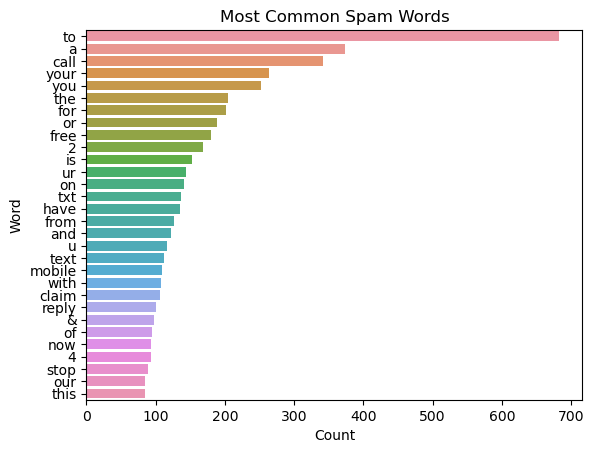

In [20]:
# Spam Most Common Words
spam_only = spam_df[spam_df["Spam?"] == 1]
spam_words = ""
for message in spam_only["Message"]:
    spam_words = spam_words.lower() + " " + message
spam_word_array = spam_words.split(" ")
spam_most_common = Counter(spam_word_array).most_common(30)
spam_words_df = pd.DataFrame(spam_most_common, columns = ["Word", "Count"])

# Barplot for Most Common Spam Words
sns.barplot(data=spam_words_df, x="Count", y="Word").set(title="Most Common Spam Words")

This barplot displays the thirty words that were found most often in messages labeled as spam in the data set, as well as the amount of times they appeared. As can be seen, some of the most common spam words that may play a roll in determining whether the message is spam or ham are 'can', 'have', 'u', 'but', 'if', 'do', and 'will.'

[Text(0.5, 1.0, 'Most Common Ham Words')]

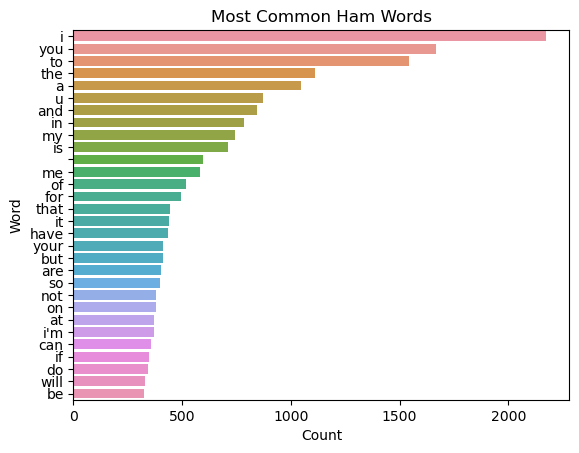

In [21]:
# Ham Most Common Words 
ham_only = spam_df[spam_df["Spam?"] == 0]
ham_words = ""
for message in ham_only["Message"]:
    ham_words = ham_words.lower() + " " + message
ham_word_array = ham_words.split(" ")
ham_most_common = Counter(ham_word_array).most_common(30)
ham_words_df = pd.DataFrame(ham_most_common, columns = ["Word", "Count"])

# Barplot for Most Common Ham Words
sns.barplot(data=ham_words_df, x="Count", y="Word").set(title="Most Common Ham Words")

## Section Two: Visualization of Spam Dataframe Variables
Section two features seaborn visualizations of the new variables (columns) added to the data frame in section one. These visualizations include barplots and scatterpots. 
### Visualization One: Mean Length of Message for Spam and Ham
Visualization one is a barplot with the `Spam?` variable on the x-axis and mean `length_of_mess` on the y-axis, labeled as 'Spam' and 'Length of Message' respectively. The blue bar represents the mean length of ham messages and the orange bar represents the mean length of spam messages. The black line at the top of both the blue and orange bars represents the margin of error. As you can see by the diagram, the mean length of message for Spam messages (138.866) is almost double the mean length of message for Ham messages (71.0236). That being said, this variable can be useful in determining whether a message is spam or ham, as longer messages tend to be spam messages. 

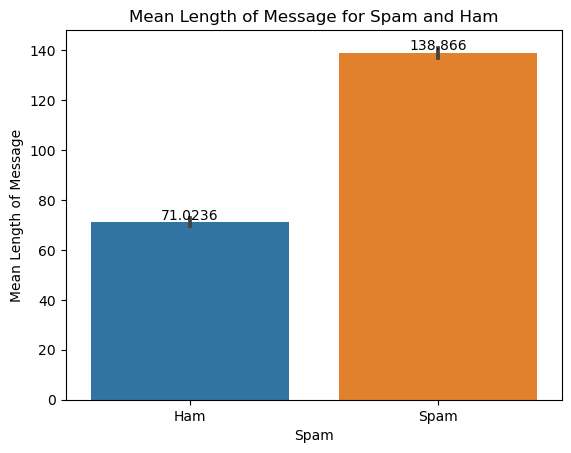

In [36]:
# Mean Length of Message for Spam and Ham 
plot_one_data = spam_df
plot_one_data["Variable"] = np.where(plot_one_data["Spam?"] ==1, "Spam", "Ham")
plot_one = sns.barplot(data=plot_one_data, y="length_of_mess", x="Variable")
plot_one.set(xlabel="Spam", ylabel="Mean Length of Message", title="Mean Length of Message for Spam and Ham")
for i in plot_one.containers:
    plot_one.bar_label(i,)

### Visualization Two: Mean Number of Non-Alphanumeric Characters for Spam and Ham
Visualization two is a barplot with the `Spam?` variable on the x-axis and the mean `num_rand_letters` on y-axis, labeled 'Spam' and 'Mean Number of Non-Alphanumeric Characters' respectively. The blue bar represents the mean number of non-alphanumeric characters for ham messages and the orange bar represents the mean number of non-alphanumeric characters for spam messages. The black lines on the top on both boxes display the margin of error. The margin of error for the orange spam bar is significantly larger than the margin of error for the blue ham bar, pointing towards the fact that there is a greater variation in number of non-alphanumeric character values for spam messages in comparison to ham messages. As the barplot shows, the mean number of non-alphanumeric characters is also greater for spam messages (1.55957) in comparison to ham messages (0.402694) by over three times. This might indicate the messages with greater amounts of non-alphanumeric characters might be spam messages and can be useful when running the logistic regressin, multinomial Naive Bayes, and bernoulli Naive Bayes tests. 

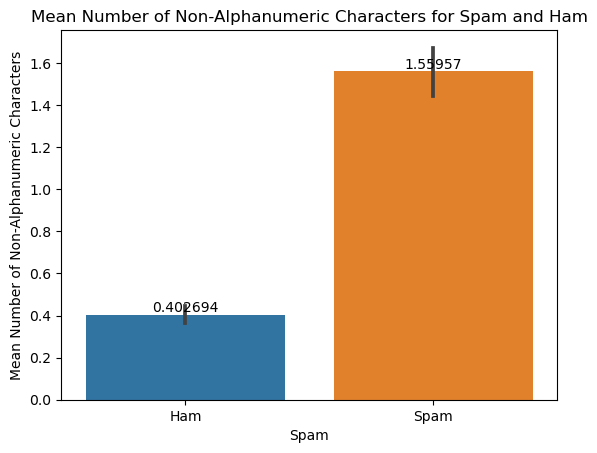

In [40]:
# Mean Number of Non-Alphanumeric for Spam and Ham 

plot_two_data = spam_df
plot_two_data["Variable"] = np.where(plot_two_data["Spam?"] ==1, "Spam", "Ham")
plot_two = sns.barplot(data=plot_two_data, y="num_rand_letters", x="Variable")
plot_two.set(xlabel="Spam", ylabel="Mean Number of Non-Alphanumeric Characters", title="Mean Number of Non-Alphanumeric Characters for Spam and Ham")
for i in plot_two.containers:
    plot_two.bar_label(i,)

### Visualization Three: Mean Number of Winning References for Spam and Ham
Visualization three is a barplot with the `Spam?` variable on the x-axis and the mean `num_winner` on y-axis, labeled 'Spam' and 'Mean Number of Winning References' respectively. The blue bar represents the mean number of winning references for ham messages and the orange bar represents the mean number of winning references for spam messages. The black lines on the top on both boxes display the margin of error. The margin of error for the orange spam bar is significantly larger than the margin of error for the blue ham bar, pointing towards the fact that there is a greater variation in number of winning references for spam messages in comparison to ham messages. As the barplot shows, the mean number of winning references is also greater for spam messages (1.03614) in comparison to ham messages (0.0636269) by over seventeen times. This might indicate the messages with greater amounts of winning references might be spam messages and can be useful when running the logistic regressin, multinomial Naive Bayes, and bernoulli Naive Bayes tests. However, the data is limited in that the difference between the mean number of winning references for spam and ham is less than one. Therefore, there isn't much of a discrepency between the number of winning references that may appear in a spam message in comparison to the number of winning references that may appear in a ham message, and it may be hard to differentiate when constructing the machine learning model. 

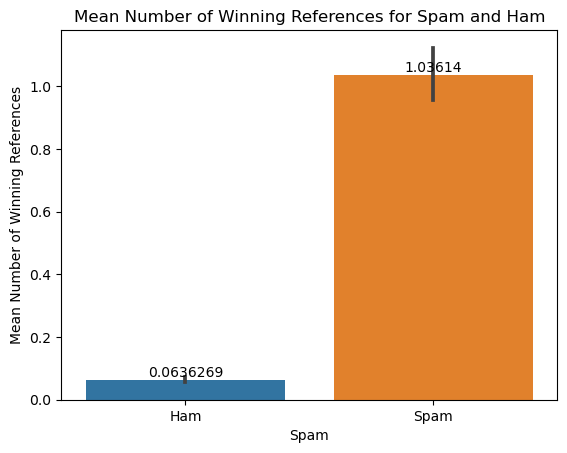

In [43]:
# Mean Number of Winning References for Spam and Ham 

plot_three_data = spam_df
plot_three_data["Variable"] = np.where(plot_one_data["Spam?"] ==1, "Spam", "Ham")
plot_three = sns.barplot(data=plot_three_data, y="num_winner", x="Variable")
plot_three.set(xlabel="Spam", ylabel="Mean Number of Winning References", title="Mean Number of Winning References for Spam and Ham")
for i in plot_three.containers:
    plot_three.bar_label(i,)

### Visualization Four: Mean Number of Website References for Spam and Ham
Visualization four is a barplot with the `Spam?` variable on the x-axis and the mean `num_of_website` on y-axis, labeled 'Spam' and 'Mean Number of Website References' respectively. The blue bar represents the mean number of website references for ham messages and the orange bar represents the mean number of website references for spam messages. The black lines on the top on both boxes display the margin of error. The margin of error for the orange spam bar is significantly larger than the margin of error for the blue ham bar, indicating that there is a greater variation in number of website references for spam messages in comparison to ham messages. As the barplot shows, the mean number of website references is also greater for spam messages (0.427041) in comparison to ham messages (0.0974093) by over four times. This might indicate the messages with greater amounts of website references, or links to websites, might be spam messages and can be useful when running the logistic regressin, multinomial Naive Bayes, and bernoulli Naive Bayes tests. As with the previous comparison in visualization three, however, the data is limited in that the difference between the mean for spam and ham messages is less than one – even less than 0.4. Considering also that the margin of error is large for the spam messages bar, the discrepency in website references for ham messages and spam message is not that large and this might not be the most beneficial variable when creating the machine learning model. 

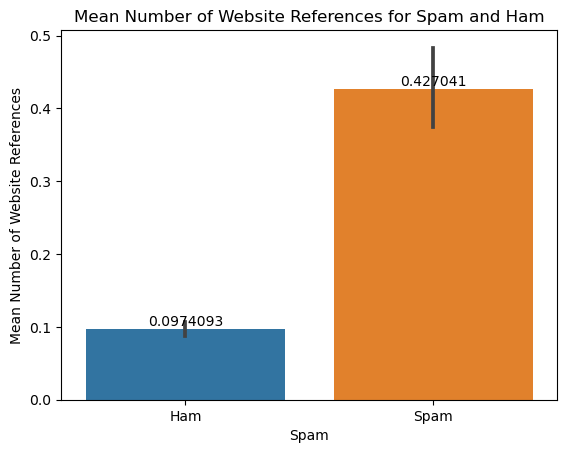

In [42]:
# Mean Number of Website References for Spam and Ham

plot_four_data = spam_df
plot_four_data["Variable"] = np.where(plot_four_data["Spam?"] ==1, "Spam", "Ham")
plot_four = sns.barplot(data=plot_four_data, y="num_of_website", x="Variable")
plot_four.set(xlabel="Spam", ylabel="Mean Number of Website References", title="Mean Number of Website References for Spam and Ham")
for i in plot_four.containers:
    plot_four.bar_label(i,)

<AxesSubplot:title={'center':'Mean Number of Phone References for Spam and Ham'}, xlabel='Spam', ylabel='Mean Number of Phone References'>

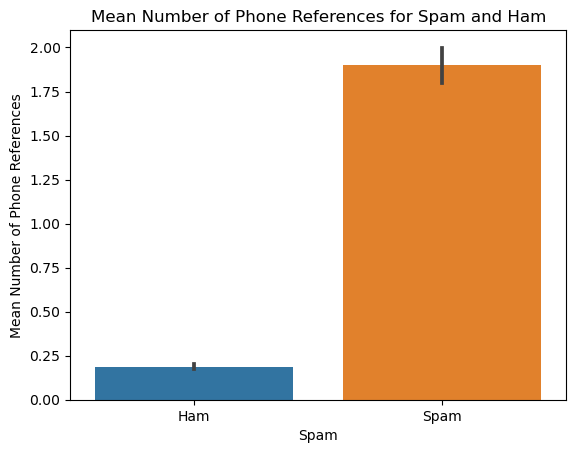

In [26]:
# Mean Number of Phone References for Spam and Ham
plot_five_data = spam_df
plot_five_data["Variable"] = np.where(plot_five_data["Spam?"] ==1, "Spam", "Ham")
plot_five = sns.barplot(data=plot_five_data, y="num_phone_related", x="Variable")
plot_five.set(xlabel="Spam", ylabel="Mean Number of Phone References", title="Mean Number of Phone References for Spam and Ham")
plot_five

<AxesSubplot:title={'center':'Mean Number of Money References for Spam and Ham'}, xlabel='Spam', ylabel='Mean Number of Money References'>

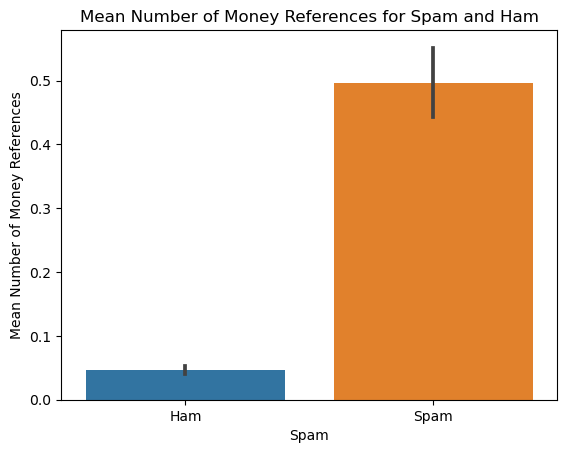

In [27]:
# Mean Number of Money References for Spam and Ham 
plot_six_data = spam_df
plot_six_data["Variable"] = np.where(plot_six_data["Spam?"] ==1, "Spam", "Ham")
plot_six = sns.barplot(data=plot_six_data, y="num_money", x="Variable")
plot_six.set(xlabel="Spam", ylabel="Mean Number of Money References", title="Mean Number of Money References for Spam and Ham")
plot_six

<AxesSubplot:title={'center':'Mean Number of Greetings for Spam and Ham'}, xlabel='Spam', ylabel='Mean Number of Greetings'>

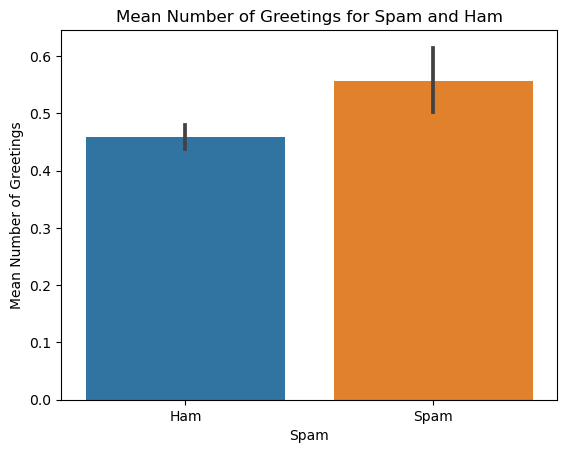

In [28]:
# Mean Number of Greetings for Spam and Ham 
plot_seven_data = spam_df
plot_seven_data["Variable"] = np.where(plot_seven_data["Spam?"] ==1, "Spam", "Ham")
plot_seven = sns.barplot(data=plot_seven_data, y="greetings", x="Variable")
plot_seven.set(xlabel="Spam", ylabel="Mean Number of Greetings", title="Mean Number of Greetings for Spam and Ham")
plot_seven

Spam Word vs Ham Word Counts

<AxesSubplot:title={'center':'Number of Spam Words vs. Number of Ham Words for Spam and Ham Messages'}, xlabel='Number of Spam Words', ylabel='Number of Ham Words'>

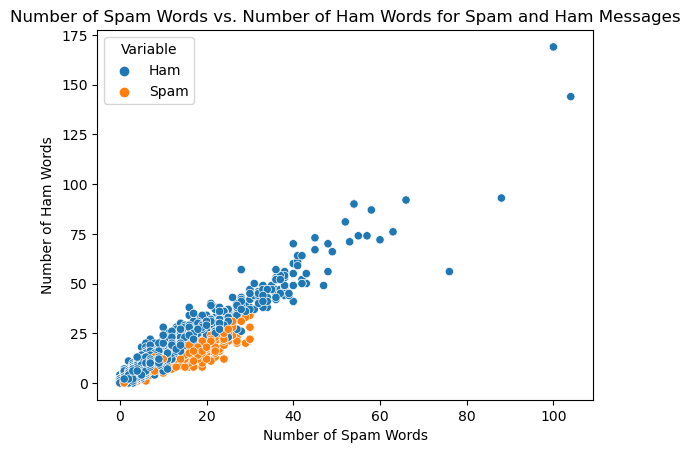

In [29]:
# Number of Spam Words vs. Number of Ham Words for Spam and Ham Messages
plot_eight_data = spam_df
plot_eight_data["Variable"] = np.where(plot_eight_data["Spam?"] ==1, "Spam", "Ham")
plot_eight = sns.scatterplot(data=plot_eight_data, y="ham_word_count", x="spam_word_count", hue = "Variable")
plot_eight.set(xlabel="Number of Spam Words", ylabel="Number of Ham Words", title="Number of Spam Words vs. Number of Ham Words for Spam and Ham Messages")
plot_eight

## Section Three: Spam Data Frame Tests
### Preparing the Training and Testing Data

In [30]:

spam_data = spam_df.drop(columns=["Spam?", "Message", "Variable"])
spam_target = spam_df["Spam?"]
X_train, X_test, y_train_target, y_test_target = train_test_split(spam_data, spam_target, test_size = 0.2, random_state=999)
X_train.head()

,num_phone_related,num_winner,greetings,num_of_website,num_rand_letters,num_money,length_of_mess,spam_word_count,ham_word_count
2889,0,0,0,0,0,0,54,8,10
2751,0,0,0,1,0,0,37,7,7
4162,0,0,0,1,0,0,35,5,6
1322,0,0,0,0,0,0,34,4,5
2351,2,0,0,0,0,0,120,13,15


### Logistic Regression Test

The First Twenty Predictions are:  [0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0]
The Accuracy Score for the Logistic Regression is:  0.9506726457399103
The Confusion Matrix for the Logistic Regression is: 


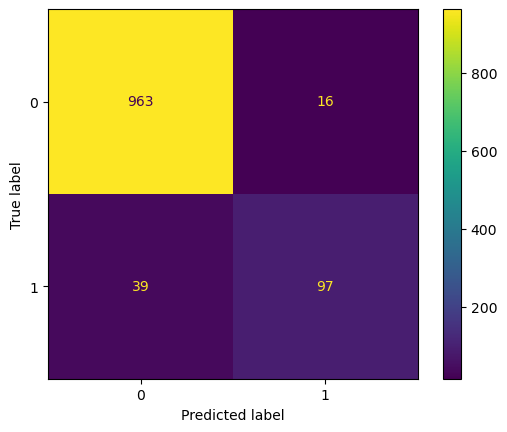

In [31]:
# Trial One: Logistic Regression using Scikit-Learn

num_log = X_train.values
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X=num_log, y=y_train_target)

num_log1 = X_test.values
log_predicted = log_model.predict(num_log1)

ConfusionMatrixDisplay.from_estimator(estimator=log_model, X=num_log1, y=y_test_target)
plt.grid(False)

score = accuracy_score(y_true = y_test_target, y_pred=log_predicted)
print("The First Twenty Predictions are: ", log_predicted[:20])
print("The Accuracy Score for the Logistic Regression is: ", score)
print("The Confusion Matrix for the Logistic Regression is: ")

### Multinomial Naive Bayes Test

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train_target)
y_pred = mnb.predict(X_test)

print("The First Twenty Predictions are: ", y_pred[:20])
print("The Accuracy Score for the MultinomialNB is: ", accuracy_score(y_test_target, y_pred))
print("The Confusion Matrix for the MultinomialNB is: \n", confusion_matrix(y_test_target,y_pred))

### Bernoulli Naive Bayes Test
#### Preparing the Data Frame

In [ ]:
# Creating the Boolean Dataframe for BernoulliNB
bernoulli_df = pd.DataFrame({})
bernoulli_df["Spam?"] = spam_df["Spam?"]
bernoulli_df["Message"] = spam_df["Message"]
bernoulli_df["Phone_Related"] = np.where(spam_df["num_phone_related"] > 0, True, False)
bernoulli_df["Winner_Related"] = np.where(spam_df["num_winner"] > 0, True, False)
bernoulli_df["Website_Related"] = np.where(spam_df["num_of_website"] > 0, True, False)
bernoulli_df["Random_Letters"] = np.where(spam_df["num_rand_letters"] > 0, True, False)
bernoulli_df["Greetings"] = np.where(spam_df["greetings"] > 0, True, False)
bernoulli_df["Money_Related"] = np.where(spam_df["num_money"] > 0, True, False)

bernoulli_data = bernoulli_df.drop(columns=["Spam?", "Message"])
bernoulli_target = bernoulli_df["Spam?"]
X_train_bnb, X_test_bnb, y_train_target_bnb, y_test_target_bnb = train_test_split(bernoulli_data, bernoulli_target, test_size = 0.3, random_state=999)
X_train_bnb.head()

#### Performing the Test

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train_bnb, y_train_target_bnb)
y_pred = bnb.predict(X_test_bnb)

print("First Twenty Predictions: ", y_pred[:20])
print("The Accuracy Score for the BernoulliNB is: ", accuracy_score(y_test_target_bnb, y_pred))
print("The Confusion Matrix for the BernoulliNB is: \n", confusion_matrix(y_test_target_bnb,y_pred))

### Count Vectorizer Test
#### Preparing the Data Frame

In [ ]:
# Count Vectorizer 
cv_data = spam_df["Message"]
cv_target = spam_df["Spam?"]
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(cv_data, cv_target, test_size = 0.2, random_state=999)
X_train.head()

count_vect = CountVectorizer()
cv_features = count_vect.fit_transform(X_train_cv)
model = svm.SVC()
model.fit(cv_features,y_train_cv)
features_test = count_vect.transform(X_test_cv)
print("Accuracy: {}".format(model.score(features_test,y_test_cv)))
print(features_test)
# https://blog.logrocket.com/email-spam-detector-python-machine-learning/

Site
https://www.codingninjas.com/studio/library/spam-ham-classification-using-naive-bayes#:~:text=Ham%20refers%20to%20genuine%20mail,Naive%20Bayes%20in%20machine%20learning.

https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python#